In [1]:
# Import required libraries and modules
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

import warnings 
warnings.simplefilter('ignore')

In [2]:
# Load the Train dataset
train = pd.read_csv('train.csv')
train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [3]:
# Load the Test dataset
test = pd.read_csv('test.csv')
test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [4]:
# Combine Two Dataset - Train and Test Dataset
data = pd.concat([train, test])
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [5]:
data.describe()

,uniqueID,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


In [7]:
data.dtypes

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

In [8]:
data.isnull().any()

uniqueID       False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

In [9]:
# Creating a new column Review_Sentiment
data.loc[(data['rating'] > 5), 'Review_Sentiment'] = 1
data.loc[(data['rating'] <= 5), 'Review_Sentiment'] = 0

data['Review_Sentiment'].value_counts()

Review_Sentiment
1.0    150768
0.0     64295
Name: count, dtype: int64

In [10]:
# Converting the date into datetime format
data['date'] = pd.to_datetime(data['date'], errors = 'coerce')

# Extracting year, month, date from date
data['Year'] = data['date'].dt.year
data['Month'] = data['date'].dt.month
data['Day'] = data['date'].dt.day

### Data Preprocessing

In [11]:
def review_clean(review):
    # Changing reviews to lower case
    to_lower = review.str.lower()
    
    # Replacing the repeating pattern of &#039;
    repeat_pattern_remove = to_lower.str.replace("&#039;", "")
    
    # Removing all special characters
    special_char_remove = repeat_pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all ASCII characters
    non_ascii_char_remove = special_char_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing whitespaces
    whitespace_remove = non_ascii_char_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple spaces with single space
    multiple_space_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing two or more dots with one
    dataframe = multiple_space_remove.str.replace(r'\.{2,}', ' ')

    return dataframe

In [12]:
data['review_clean'] = review_clean(data['review'])
data.head(3)

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,Year,Month,Day,review_clean
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,1.0,2012,5,20,"""it has no side effect, i take it in combinati..."
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,1.0,2010,4,27,"""my son is halfway through his fourth week of ..."
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,0.0,2009,12,14,"""i used to take another oral contraceptive, wh..."


In [13]:
# Contraction Dictionary for the expansion
import re
contractions_dict = {
    "ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because",
    "could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not",
    "doesn’t": "does not", "don't": "do not", "don’t": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not",
    "haven't": "have not", "he'd": "he had", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "he's": "he is",
    "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "i'd": "i would", "i'd've": "i would have",
    "i'll": "i will", "i'll've": "i will have", "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have",
    "it'll": "it will", "it'll've": "it will have", "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not","might've": "might have",
    "mightn't": "might not", "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have",
    "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have",
    "shan't": "shall not","sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have",
    "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", 
    "shouldn't've": "should not have", "so've": "so have", "so's": "so is", "that'd": "that would", "that'd've": "that would have",
    "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "they'd": "they would",
    "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have",
    "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have",
    "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
    "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
    "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is",
    "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have",
    "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y’all": "you all", "y'all'd": "you all would",
    "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have", "you'd": "you would", "you'd've": "you would have",
    "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have", "ain’t": "am not", "aren’t": "are not",
    "can’t": "cannot", "can’t’ve": "cannot have", "’cause": "because", "could’ve": "could have", "couldn’t": "could not", "couldn’t’ve": "could not have",
    "didn’t": "did not", "doesn’t": "does not", "don’t": "do not", "don’t": "do not", "hadn’t": "had not", "hadn’t’ve": "had not have",
    "hasn’t": "has not", "haven’t": "have not", "he’d": "he had", "he’d’ve": "he would have", "he’ll": "he will", "he’ll’ve": "he will have",
    "he’s": "he is", "how’d": "how did", "how’d’y": "how do you", "how’ll": "how will", "how’s": "how is", "i’d": "i would", "i’d’ve": "i would have",
    "i’ll": "i will", "i’ll’ve": "i will have", "i’m": "i am", "i’ve": "i have", "isn’t": "is not", "it’d": "it would", "it’d’ve": "it would have",
    "it’ll": "it will", "it’ll’ve": "it will have", "it’s": "it is", "let’s": "let us", "ma’am": "madam", "mayn’t": "may not",
    "might’ve": "might have", "mightn’t": "might not", "mightn’t’ve": "might not have", "must’ve": "must have", "mustn’t": "must not",
    "mustn’t’ve": "must not have", "needn’t": "need not", "needn’t’ve": "need not have", "o’clock": "of the clock",
    "oughtn’t": "ought not", "oughtn’t’ve": "ought not have", "shan’t": "shall not", "sha’n’t": "shall not", "shan’t’ve": "shall not have",
    "she’d": "she would", "she’d’ve": "she would have", "she’ll": "she will", "she’ll’ve": "she will have", "she’s": "she is",
    "should’ve": "should have", "shouldn’t": "should not", "shouldn’t’ve": "should not have", "so’ve": "so have", "so’s": "so is",
    "that’d": "that would", "that’d’ve": "that would have", "that’s": "that is", "there’d": "there would", "there’d’ve": "there would have",
    "there’s": "there is", "they’d": "they would", "they’d’ve": "they would have", "they’ll": "they will", "they’ll’ve": "they will have",
    "they’re": "they are", "they’ve": "they have", "to’ve": "to have", "wasn’t": "was not", "we’d": "we would", "we’d’ve": "we would have",
    "we’ll": "we will", "we’ll’ve": "we will have", "we’re": "we are", "we’ve": "we have", "weren’t": "were not", "what’ll": "what will",
    "what’ll’ve": "what will have", "what’re": "what are", "what’s": "what is", "what’ve": "what have", "when’s": "when is",
    "when’ve": "when have", "where’d": "where did", "where’s": "where is", "where’ve": "where have", "who’ll": "who will",
    "who’ll’ve": "who will have", "who’s": "who is", "who’ve": "who have","why’s": "why is", "why’ve": "why have", "will’ve": "will have",
    "won’t": "will not", "won’t’ve": "will not have", "would’ve": "would have", "wouldn’t": "would not", "wouldn’t’ve": "would not have",
    "y’all": "you all", "y’all": "you all", "y’all’d": "you all would", "y’all’d’ve": "you all would have", "y’all’re": "you all are",
    "y’all’ve": "you all have", "you’d": "you would", "you’d’ve": "you would have", "you’ll": "you will", "you’ll’ve": "you will have",
    "you’re": "you are", "you’re": "you are", "you’ve": "you have"
}
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function expand the contractions if there's any
def expand_contractions(s, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)


# Expanding the contractions
data['review_clean'] = data['review_clean'].apply(lambda x: expand_contractions(x))
data.head(3)

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,Year,Month,Day,review_clean
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,1.0,2012,5,20,"""it has no side effect, i take it in combinati..."
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,1.0,2010,4,27,"""my son is halfway through his fourth week of ..."
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,0.0,2009,12,14,"""i used to take another oral contraceptive, wh..."


In [14]:
# Using Stopwords to extract the useful words in review_clean
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
data['review_clean'] = data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [15]:
# Removing the word stems using the Snowball Stemmer in review_clean
import nltk
from nltk.stem import SnowballStemmer

snow_ball_stemmer = SnowballStemmer(language = "english")
data['review_clean'] = data['review_clean'].apply(lambda x: " ".join(snow_ball_stemmer.stem(word) for word in x.split()))

In [16]:
# Sentiment polarity of all reviews
from textblob import TextBlob

def sentiment_polarity(review):
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [17]:
# Evaluating Sentiment Polarity for Uncleaned Reviews
data['sentiment'] = sentiment_polarity(data['review'])

# Evaluating Sentiment Polarity for Cleaned Reviews
data['sentiment_clean'] = sentiment_polarity(data['review_clean'])

In [18]:
# Cleaning the reviews without using Snowball Stemmer and Stopwords
data['review_clean_ss'] = review_clean(data['review'])

# Evaluating Sentiment Polarity for cleaned Reviews without using Snowball Stemmer and Stopwords
data['sentiment_clean_ss'] = sentiment_polarity(data['review_clean_ss'])
data.head(3)

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,Year,Month,Day,review_clean,sentiment,sentiment_clean,review_clean_ss,sentiment_clean_ss
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,1.0,2012,5,20,"""it side effect, take combin bystol 5 mg fish ...",0.000000,0.000000,"""it has no side effect, i take it in combinati...",0.000000
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,1.0,2010,4,27,"""mi son halfway fourth week intuniv. becam con...",0.168333,0.151923,"""my son is halfway through his fourth week of ...",0.168333
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,0.0,2009,12,14,"""i use take anoth oral contraceptive, 21 pill ...",0.067210,0.080769,"""i used to take another oral contraceptive, wh...",0.067210


In [19]:
# Remove Missing Values
data = data.dropna(how="any", axis=0)

In [20]:
import string

# Words count in each review
data['words_count']=data["review_clean_ss"].apply(lambda x: len(str(x).split()))

# Unique words count in each review
data['unique_words_count']=data["review_clean_ss"].apply(lambda x: len(set(str(x).split())))

# Letters count in each review
data['letters_count']=data["review_clean_ss"].apply(lambda x: len(str(x)))

# Punctuations count in each review
data["punctuations_count"] = data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# Upper case words count in each review
data["uppercase_words_count"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

# Title case words count in each review
data["titlecase_words_count"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

# Stopwords count in each review
data["stopwords_count"] = data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

# Average length of the words in each review
data["average_word_length"] = data["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [21]:
data.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'Review_Sentiment', 'Year', 'Month', 'Day',
       'review_clean', 'sentiment', 'sentiment_clean', 'review_clean_ss',
       'sentiment_clean_ss', 'words_count', 'unique_words_count',
       'letters_count', 'punctuations_count', 'uppercase_words_count',
       'titlecase_words_count', 'stopwords_count', 'average_word_length'],
      dtype='object')

In [22]:
# Label Encoding Drugname and Conditions
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['drugName', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    data[feature] = label_encoder_feat[feature].fit_transform(data[feature])

data.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,Year,Month,...,review_clean_ss,sentiment_clean_ss,words_count,unique_words_count,letters_count,punctuations_count,uppercase_words_count,titlecase_words_count,stopwords_count,average_word_length
0,206461,3421,480,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,1.0,2012,5,...,"""it has no side effect, i take it in combinati...",0.000000,17,17,79,3,1,6,7,3.705882
1,95260,1536,80,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,1.0,2010,4,...,"""my son is halfway through his fourth week of ...",0.168333,141,106,741,23,2,13,69,4.248227
2,92703,1983,175,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,0.0,2009,12,...,"""i used to take another oral contraceptive, wh...",0.067210,134,95,743,34,6,15,59,4.544776
3,138000,2446,175,"""This is my first time using any form of birth...",8,2015-11-03,10,1.0,2015,11,...,"""this is my first time using any form of birth...",0.179545,89,57,442,15,4,9,45,3.977528
4,35696,553,593,"""Suboxone has completely turned my life around...",9,2016-11-27,37,1.0,2016,11,...,"""suboxone has completely turned my life around...",0.194444,124,86,695,28,7,15,60,4.532258
5,155963,715,170,"""2nd day on 5mg started to work with rock hard...",2,2015-11-28,43,0.0,2015,11,...,"""2nd day on 5mg started to work with rock hard...",0.003472,68,57,391,22,0,3,18,4.735294
6,165907,1874,314,"""He pulled out, but he cummed a bit in me. I t...",1,2017-03-07,5,0.0,2017,3,...,"""he pulled out, but he cummed a bit in me. i t...",0.111111,30,27,136,11,2,4,8,3.566667
7,102654,284,174,"""Abilify changed my life. There is hope. I was...",10,2015-03-14,32,1.0,2015,3,...,"""abilify changed my life. there is hope. i was...",0.074107,146,94,727,24,13,27,77,3.979452
8,74811,1779,324,""" I Ve had nothing but problems with the Kepp...",1,2016-08-09,11,0.0,2016,8,...,""" i ve had nothing but problems with the kepp...",0.200000,35,27,193,14,1,3,11,4.514286
9,48928,1263,175,"""I had been on the pill for many years. When m...",8,2016-12-08,1,1.0,2016,12,...,"""i had been on the pill for many years. when m...",0.079167,142,102,719,28,13,16,66,4.070423


### Define Features and Spliting Data

In [23]:
from sklearn.model_selection import train_test_split
X = data[['condition', 'usefulCount', 'Day', 'Month', 'Year', 'sentiment', 'sentiment_clean_ss', 
                'words_count', 'unique_words_count', 'letters_count','punctuations_count', 'uppercase_words_count',
                'titlecase_words_count', 'stopwords_count', 'average_word_length']]
y = data['Review_Sentiment']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(171095, 15) (42774, 15)
(171095,) (42774,)


### LGBM Classifier

In [25]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

clf = LGBMClassifier(
        n_estimators = 20000,
        learning_rate = 0.20,
        num_leaves = 40,
        subsample = .9,
        max_depth = 14,
        reg_alpha = .5,
        reg_lambda = .5,
        min_split_gain = .03,
        min_child_weight = 3,
        silent=-1,
        verbose=-1,
        )
model_one = clf.fit(X_train, y_train)
pred_one_test = model_one.predict(X_test)
pred_one_train = model_one.predict(X_train)

print ("Accuracy on Training Data: ", accuracy_score(y_train, pred_one_train))
print ("Accuracy on Testing Data: ", accuracy_score(y_test, pred_one_test))
print ("Precision on Testing Data: ", precision_score(y_test, pred_one_test))
print ("Recall on Testing Data: ", recall_score(y_test, pred_one_test))
print ("F1 Score on Testing Data: ", f1_score(y_test, pred_one_test))


lgbm_clf_train = accuracy_score(y_train, pred_one_train)
lgbm_clf_test = accuracy_score(y_test, pred_one_test)

Accuracy on Training Data:  0.9943189456150092
Accuracy on Testing Data:  0.8986300088839014
Precision on Testing Data:  0.9102068215963942
Recall on Testing Data:  0.949101696610113
F1 Score on Testing Data:  0.9292474381567783


### Confusion Matrix of LGBM Classifier

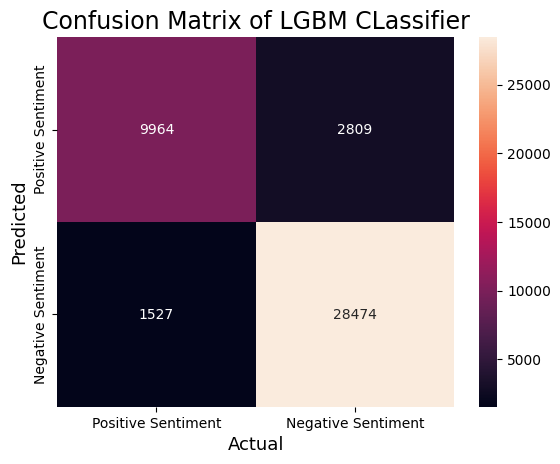

In [26]:
cm = confusion_matrix(y_test, pred_one_test)

sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Positive Sentiment','Negative Sentiment'],
            yticklabels=['Positive Sentiment','Negative Sentiment'])
plt.ylabel('Predicted',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix of LGBM CLassifier',fontsize=17)
plt.show()

### XGBoost Classifier

In [27]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

model_two = xgb.fit(X_train, y_train)
pred_two_train = model_two.predict(X_train)
pred_two_test = model_two.predict(X_test)

print ("Accuracy on Training Data: ", accuracy_score(y_train, pred_two_train))
print ("Accuracy on Testing Data: ", accuracy_score(y_test, pred_two_test))
print ("Precision on Testing Data: ", precision_score(y_test, pred_two_test))
print ("Recall on Testing Data: ", recall_score(y_test, pred_two_test))
print ("F1 Score on Testing Data: ", f1_score(y_test, pred_two_test))


xgb_clf_train = accuracy_score(y_train, pred_two_train)
xgb_clf_test = accuracy_score(y_test, pred_two_test)

Accuracy on Training Data:  0.795137204477045
Accuracy on Testing Data:  0.7776920559218217
Precision on Testing Data:  0.7993630573248408
Recall on Testing Data:  0.9119362687910403
F1 Score on Testing Data:  0.851947000482663


### CatBoost Classifier

In [28]:
from catboost import CatBoostClassifier

cat_clf = CatBoostClassifier(iterations = 100, learning_rate = 0.5)

model_three = cat_clf.fit(X_train, y_train)
pred_train_three = model_three.predict(X_train)
pred_test_three = model_three.predict(X_test)

print ("Accuracy on Training Data: ", accuracy_score(y_train, pred_train_three))
print ("Accuracy on Testing Data: ", accuracy_score(y_test, pred_test_three))
print ("Precision on Testing Data: ", precision_score(y_test, pred_test_three))
print ("Recall on Testing Data: ", recall_score(y_test, pred_test_three))
print ("F1 Score on Testing Data: ", f1_score(y_test, pred_test_three))


catb_clf_train = accuracy_score(y_train, pred_train_three)
catb_clf_test = accuracy_score(y_test, pred_test_three)

0:	learn: 0.5804071	total: 214ms	remaining: 21.2s
1:	learn: 0.5413893	total: 248ms	remaining: 12.2s
2:	learn: 0.5245131	total: 279ms	remaining: 9.03s
3:	learn: 0.5169191	total: 313ms	remaining: 7.5s
4:	learn: 0.5124387	total: 344ms	remaining: 6.53s
5:	learn: 0.5090970	total: 373ms	remaining: 5.84s
6:	learn: 0.5066599	total: 408ms	remaining: 5.43s
7:	learn: 0.5047931	total: 450ms	remaining: 5.17s
8:	learn: 0.5038500	total: 480ms	remaining: 4.85s
9:	learn: 0.5028902	total: 510ms	remaining: 4.59s
10:	learn: 0.5013339	total: 538ms	remaining: 4.35s
11:	learn: 0.5004859	total: 566ms	remaining: 4.15s
12:	learn: 0.4998158	total: 594ms	remaining: 3.97s
13:	learn: 0.4984225	total: 625ms	remaining: 3.84s
14:	learn: 0.4956493	total: 660ms	remaining: 3.74s
15:	learn: 0.4948030	total: 694ms	remaining: 3.64s
16:	learn: 0.4935550	total: 731ms	remaining: 3.57s
17:	learn: 0.4929956	total: 762ms	remaining: 3.47s
18:	learn: 0.4925840	total: 788ms	remaining: 3.36s
19:	learn: 0.4919072	total: 819ms	remainin

### Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier  

rf_clf = RandomForestClassifier(n_estimators= 5, criterion="entropy")  

model_four = rf_clf.fit(X_train, y_train)  
pred_train_four = model_four.predict(X_train)
pred_test_four = model_four.predict(X_test)

print ("Accuracy on Training Data: ", accuracy_score(y_train, pred_train_four))
print ("Accuracy on Testing Data: ", accuracy_score(y_test, pred_test_four))
print ("Precision on Testing Data: ", precision_score(y_test, pred_test_four))
print ("Recall on Testing Data: ", recall_score(y_test, pred_test_four))
print ("F1 Score on Testing Data: ", f1_score(y_test, pred_test_four))


rf_train = accuracy_score(y_train, pred_train_four)
rf_test = accuracy_score(y_test, pred_test_four)

Accuracy on Training Data:  0.9865630205441421
Accuracy on Testing Data:  0.8767709356150932
Precision on Testing Data:  0.897588424437299
Recall on Testing Data:  0.9304689843671877
F1 Score on Testing Data:  0.9137329994599106


### Gradient Boosting Classifier

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()

model_five = gb_clf.fit(X_train, y_train)  
pred_train_five = model_five.predict(X_train)
pred_test_five = model_five.predict(X_test)

print ("Accuracy on Training Data: ", accuracy_score(y_train, pred_train_five))
print ("Accuracy on Testing Data: ", accuracy_score(y_test, pred_test_five))
print ("Precision on Testing Data: ", precision_score(y_test, pred_test_five))
print ("Recall on Testing Data: ", recall_score(y_test, pred_test_five))
print ("F1 Score on Testing Data: ", f1_score(y_test, pred_test_five))


gb_clf_train = accuracy_score(y_train, pred_train_five)
gb_clf_test = accuracy_score(y_test, pred_test_five)

Accuracy on Training Data:  0.7596598381016394
Accuracy on Testing Data:  0.76240239397765
Precision on Testing Data:  0.7818698493890309
Recall on Testing Data:  0.9171027632412253
F1 Score on Testing Data:  0.8441042475188292


### K-Nearest Neighbors

In [34]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors = 7) 

model_six = knn.fit(X_train, y_train)  
pred_train_six = model_six.predict(X_train)
pred_test_six = model_six.predict(X_test)

print ("Accuracy on Training Data: ", accuracy_score(y_train, pred_train_six))
print ("Accuracy on Testing Data: ", accuracy_score(y_test, pred_test_six))
print ("Precision on Testing Data: ", precision_score(y_test, pred_test_six))
print ("Recall on Testing Data: ", recall_score(y_test, pred_test_six))
print ("F1 Score on Testing Data: ", f1_score(y_test, pred_test_six))


knn_train = accuracy_score(y_train, pred_train_six)
knn_test = accuracy_score(y_test, pred_test_six)

Accuracy on Training Data:  0.7887664747654811
Accuracy on Testing Data:  0.7071117968859587
Precision on Testing Data:  0.7640622638658002
Recall on Testing Data:  0.8426052464917836
F1 Score on Testing Data:  0.8014139428716355


### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()


model_seven = lr.fit(X_train, y_train)  
pred_train_seven = model_seven.predict(X_train)
pred_test_seven = model_seven.predict(X_test)

print ("Accuracy on Training Data: ", accuracy_score(y_train, pred_train_seven))
print ("Accuracy on Testing Data: ", accuracy_score(y_test, pred_test_seven))
print ("Precision on Testing Data: ", precision_score(y_test, pred_test_seven))
print ("Recall on Testing Data: ", recall_score(y_test, pred_test_seven))
print ("F1 Score on Testing Data: ", f1_score(y_test, pred_test_seven))


lr_train = accuracy_score(y_train, pred_train_seven)
lr_test = accuracy_score(y_test, pred_test_seven)

Accuracy on Training Data:  0.7046377743358953
Accuracy on Testing Data:  0.7046804133352036
Precision on Testing Data:  0.7091793723053207
Recall on Testing Data:  0.981400619979334
F1 Score on Testing Data:  0.8233731368326854


### Bar Plot of every applied models testing and training accuracy

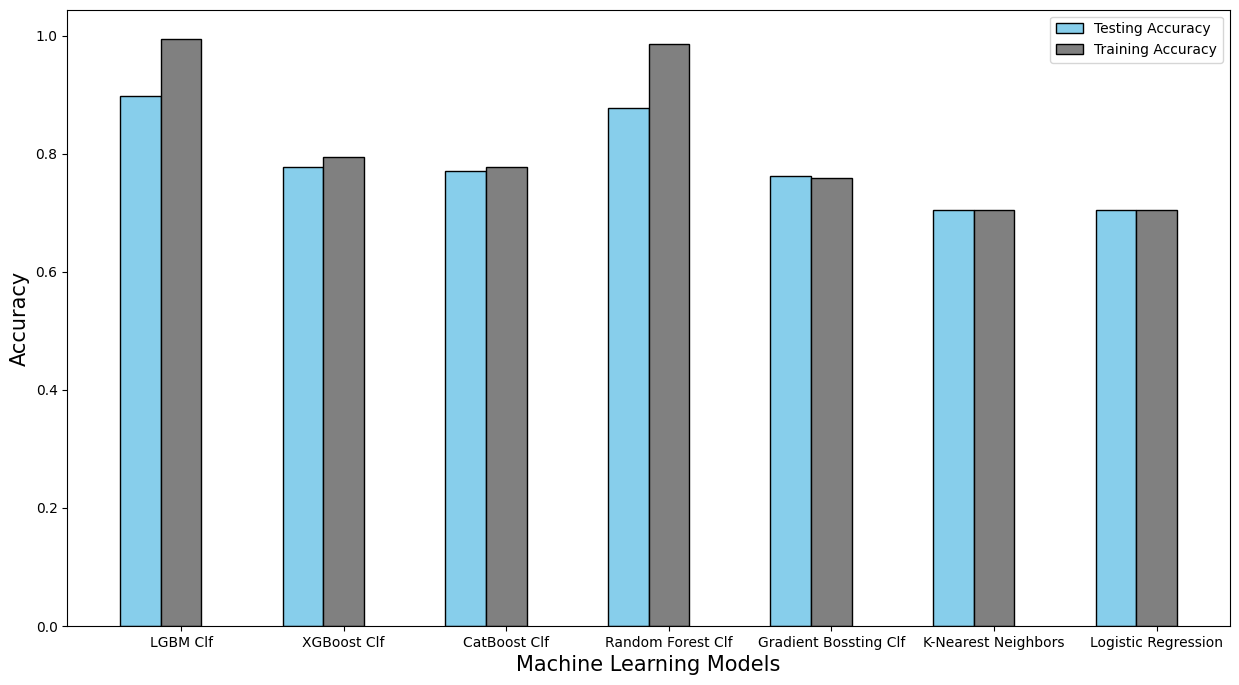

In [40]:
barWidth = 0.25
fig = plt.subplots(figsize =(15, 8))

# set height of bar
train_accuracy = [lgbm_clf_train, xgb_clf_train, catb_clf_train, rf_train, gb_clf_train, knn_train, lr_train]
test_accuracy = [lgbm_clf_test, xgb_clf_test, catb_clf_test, rf_test, gb_clf_test, knn_test, lr_test]

# Set position of bar on X axis
br1 = np.arange(len(test_accuracy))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, test_accuracy, color ='skyblue', width = barWidth, edgecolor ='black', label ='Testing Accuracy')
plt.bar(br2, train_accuracy, color ='gray', width = barWidth, edgecolor ='black', label ='Training Accuracy')

# Adding Xticks
plt.xlabel('Machine Learning Models', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(test_accuracy))],
		['LGBM Clf', 'XGBoost Clf', 'CatBoost Clf', 'Random Forest Clf', 'Gradient Bossting Clf', 'K-Nearest Neighbors', 'Logistic Regression'])
plt.legend()
plt.show()

### ROC Curve for all five models

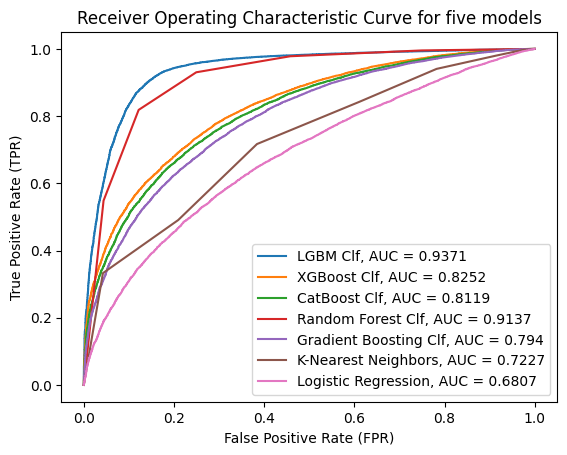

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob1 = model_one.predict_proba(X_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)
auc1 = round(roc_auc_score(y_test, y_pred_prob1), 4)


y_pred_prob2 = model_two.predict_proba(X_test)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)
auc2 = round(roc_auc_score(y_test, y_pred_prob2), 4)


y_pred_prob3 = model_three.predict_proba(X_test)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)
auc3 = round(roc_auc_score(y_test, y_pred_prob3), 4)


y_pred_prob4 = model_four.predict_proba(X_test)[:,1]
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)
auc4 = round(roc_auc_score(y_test, y_pred_prob4), 4)


y_pred_prob5 = model_five.predict_proba(X_test)[:,1]
fpr5 , tpr5, thresholds5 = roc_curve(y_test, y_pred_prob5)
auc5 = round(roc_auc_score(y_test, y_pred_prob5), 4)

y_pred_prob6 = model_six.predict_proba(X_test)[:,1]
fpr6 , tpr6, thresholds6 = roc_curve(y_test, y_pred_prob6)
auc6 = round(roc_auc_score(y_test, y_pred_prob6), 4)

y_pred_prob7 = model_seven.predict_proba(X_test)[:,1]
fpr7 , tpr7, thresholds7 = roc_curve(y_test, y_pred_prob7)
auc7 = round(roc_auc_score(y_test, y_pred_prob7), 4)


plt.plot(fpr1, tpr1, label= "LGBM Clf, AUC = " + str(auc1))
plt.plot(fpr2, tpr2, label= "XGBoost Clf, AUC = " + str(auc2))
plt.plot(fpr3, tpr3, label= "CatBoost Clf, AUC = " + str(auc3))
plt.plot(fpr4, tpr4, label= "Random Forest Clf, AUC = " + str(auc4))
plt.plot(fpr5, tpr5, label= "Gradient Boosting Clf, AUC = " + str(auc5))
plt.plot(fpr6, tpr6, label= "K-Nearest Neighbors, AUC = " + str(auc6))
plt.plot(fpr7, tpr7, label= "Logistic Regression, AUC = " + str(auc7))


plt.legend()
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title('Receiver Operating Characteristic Curve for five models')
plt.show()

### Prediction

In [43]:
# Making a predictive system
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

# input_data = (314, 5, 20, 5, 2012, 0.111111, 0.111111, 17, 17, 79, 3, 1, 6,	7, 3.705882) => Positive
input_data = (314, 5, 7, 3, 2017, 0.111111, 0.111111, 30, 27, 136, 11, 2, 4, 8, 3.566667)
# Changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the array as we are predicting for one instance
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = clf.predict(input_data_reshape)
print(prediction)

if(prediction[0]==1):
    print("Positive")
else:
    print("Negative")

[0.]
Negative
